In [1]:
import pandas as pd
import numpy as np
import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_columns",100)

In [2]:
sns.set(color_codes = True)
import os

In [3]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "history.pkl")

In [4]:
history = pd.read_pickle(PICKLE_HISTORY_DIR)
train = pd.read_pickle(PICKLE_TRAIN_DIR)

In [5]:
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,F,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,T,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,F,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,F,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,F,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [6]:
pd.DataFrame({'DTYPES' : train.dtypes , "NULLS" : train.isnull().sum() , "NULLS_percentage" : (train.isnull().sum()/len(train.index))*100})

,DTYPES,NULLS,NULLS_percentage
id,object,0,0.000000
channel_sales,object,4218,26.205268
cons_12m,int64,0,0.000000
cons_gas_12m,int64,0,0.000000
cons_last_month,int64,0,0.000000
date_activ,datetime64[ns],0,0.000000
date_end,datetime64[ns],0,0.000000
date_modif_prod,datetime64[ns],0,0.000000
date_renewal,datetime64[ns],0,0.000000
forecast_cons_12m,float64,0,0.000000


In [7]:
history

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [8]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  193002 non-null  float64       
 3   price_p2_var  193002 non-null  float64       
 4   price_p3_var  193002 non-null  float64       
 5   price_p1_fix  193002 non-null  float64       
 6   price_p2_fix  193002 non-null  float64       
 7   price_p3_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [9]:
mean_year = history.groupby(["id"]).mean().reset_index()
mean_year

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [10]:
mean_year = mean_year.rename(index = str ,  columns={"price_p1_var": "mean_year_price_p1_var",
                                                     "price_p2_var": "mean_year_price_p2_var",
                                                    "price_p3_var": "mean_year_price_p3_var",
                                                    "price_p1_fix": "mean_year_price_p1_fix",
                                                    "price_p2_fix": "mean_year_price_p2_fix",
                                                    "price_p3_fix": "mean_year_price_p3_fix",})
mean_year

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [11]:
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [12]:
##### Past 6-months grouping of prices
mean_6m = history[history["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()
mean_6m

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.437330,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555
16092,fffac626da707b1b5ab11e8431a4d0a2,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969


In [13]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
                                                "price_p2_var": "mean_6m_price_p2_var",
                                                "price_p3_var": "mean_6m_price_p3_var",
                                                "price_p1_fix": "mean_6m_price_p1_fix",
                                                "price_p2_fix": "mean_6m_price_p2_fix",
                                                "price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [14]:
mean_6m

,id,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,46.146734,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.437330,16.291555,40.843313,24.533410,16.360973
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,44.413114,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555,40.842733,24.532829,16.360393
16092,fffac626da707b1b5ab11e8431a4d0a2,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,44.501269,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,41.381645,25.064896,16.882958
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,40.767579,24.490024,16.332952


In [15]:
features = mean_year

# Dates

In [16]:
train['date_end'] - train['date_activ']

0       1460 days
1       1096 days
2       2566 days
3       2192 days
4       2192 days
           ...   
16091   1445 days
16092   1461 days
16093   1460 days
16094   1461 days
16095   2556 days
Length: 16096, dtype: timedelta64[ns]

In [17]:
print(np.timedelta64(1,'Y'))

1 years


In [18]:
train['tenure'] = ((train['date_end'] - train['date_activ'])/np.timedelta64(1, 'Y'))
train['tenure'] = train['tenure'].apply(lambda x : np.round(x,decimals = 0))
train['tenure'] = train['tenure'].astype(int)
train['tenure']

0        4
1        3
2        7
3        6
4        6
        ..
16091    4
16092    4
16093    4
16094    4
16095    7
Name: tenure, Length: 16096, dtype: int32

In [19]:
tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1).fillna(0)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure

churn,0,1
tenure,,
1,1.0,0.0
2,2.0,0.0
3,1032.0,172.0
4,3460.0,509.0
5,2818.0,333.0
6,3417.0,280.0
7,2855.0,236.0
8,301.0,22.0
9,89.0,4.0


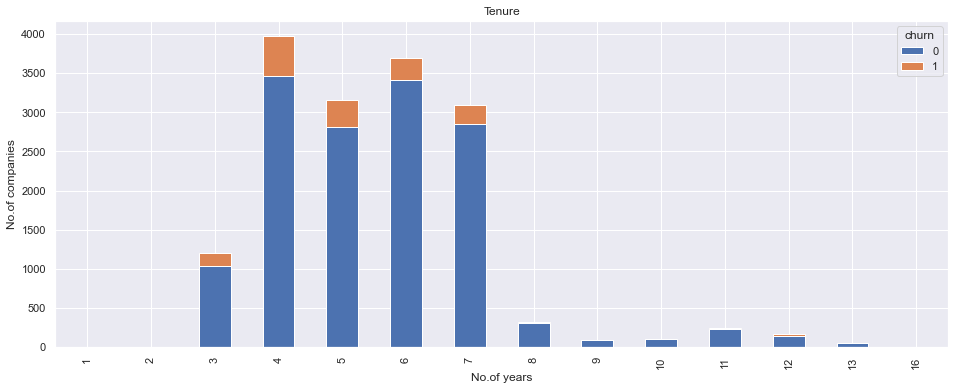

In [20]:
tenure.plot(kind = 'bar' , stacked=  True , figsize = (16,6))
plt.xlabel('No.of years')
plt.ylabel('No.of companies')
plt.title('Tenure')
plt.show()

We can clearly see that most of the churn companies are those who made a contract of within 3-7 years . Larger contract companies are mostly non-churn .

In [21]:
def convert_months(Ref_date , df , col):
    days = Ref_date - df[col]
    month = days / np.timedelta64(1,'M')
    month = month.astype(int)
    return month

In [22]:
# We can more features to get more value from dates
# Example: how many months left in contract when the customer is churned
Reference_date = datetime.datetime(2016 , 1 , 1)
Reference_date

datetime.datetime(2016, 1, 1, 0, 0)

In [23]:
train['months_to_end'] = -(convert_months(Reference_date , train , 'date_end'))
train['months_modif_prod'] = convert_months(Reference_date , train , 'date_modif_prod')
train['months_renewal'] = convert_months(Reference_date , train , 'date_renewal')

In [24]:
def plot_months(df , col , figsize_ = (18,8) , fontsize_ = 11):
    table = train[[col , 'churn' , 'id']].groupby([col , 'churn'])['id'].count().unstack(level = 1).fillna(0)
    table.plot( kind = 'bar'
              , stacked = True
              , figsize = figsize_
              )
    plt.xlabel('No.of months')
    plt.ylabel('No.of companies')
    plt.title(col)
    plt.xticks(fontsize = fontsize_)
    plt.show()

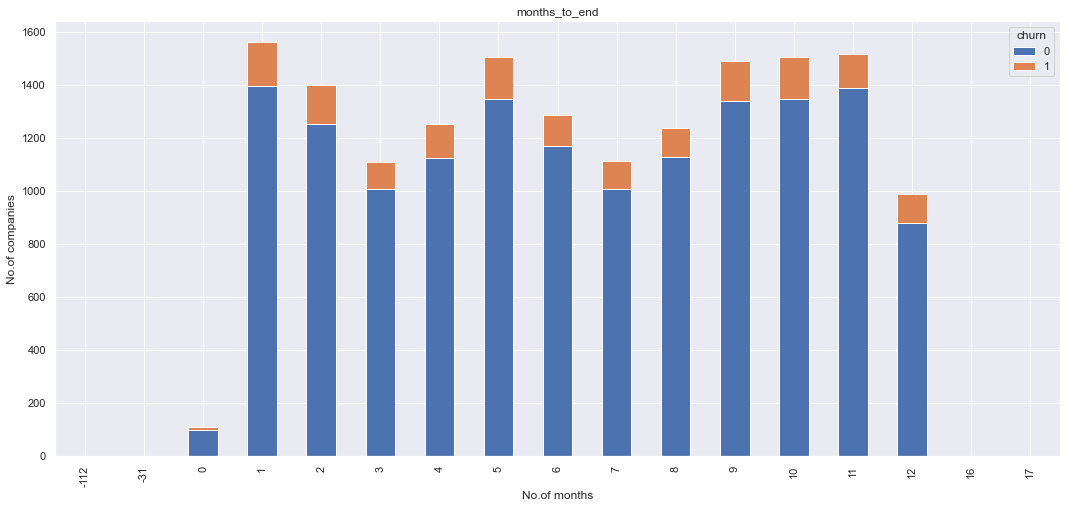

In [25]:
plot_months(train , 'months_to_end')

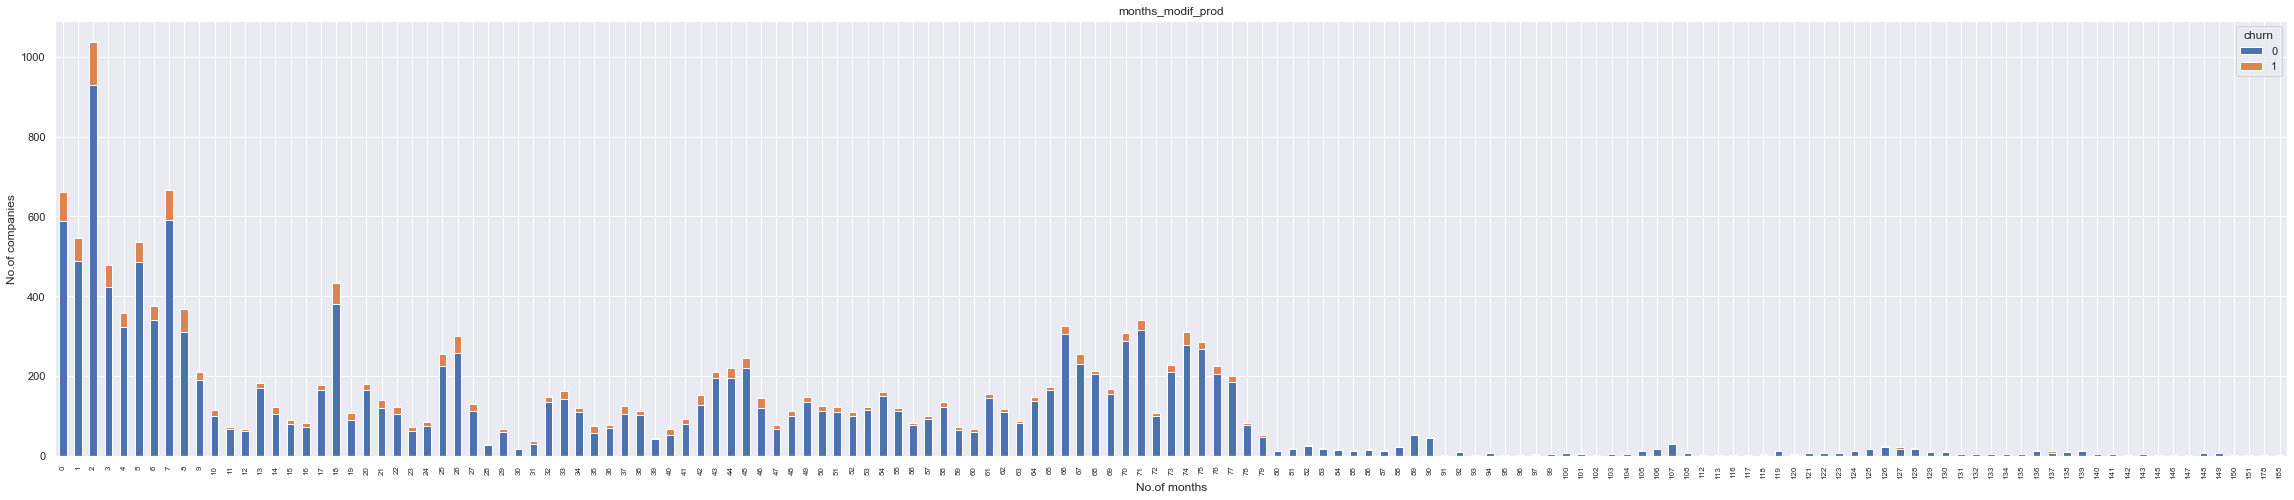

In [26]:
plot_months(train , 'months_modif_prod' , figsize_=(40,8) , fontsize_=8)

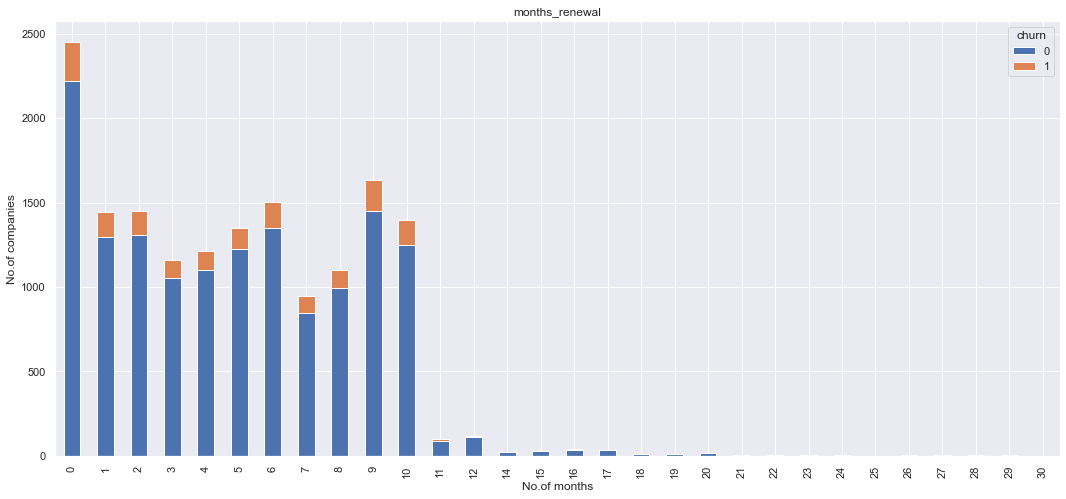

In [27]:
plot_months(train , 'months_renewal')

In [28]:
train.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

In [29]:
train["has_gas"]=train["has_gas"].replace(["t", "f"],[1,0])

In [30]:
train['channel_sales'].isnull().sum()

4218

## channel_sales

In [31]:
# Replacing with string
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")

<AxesSubplot:>

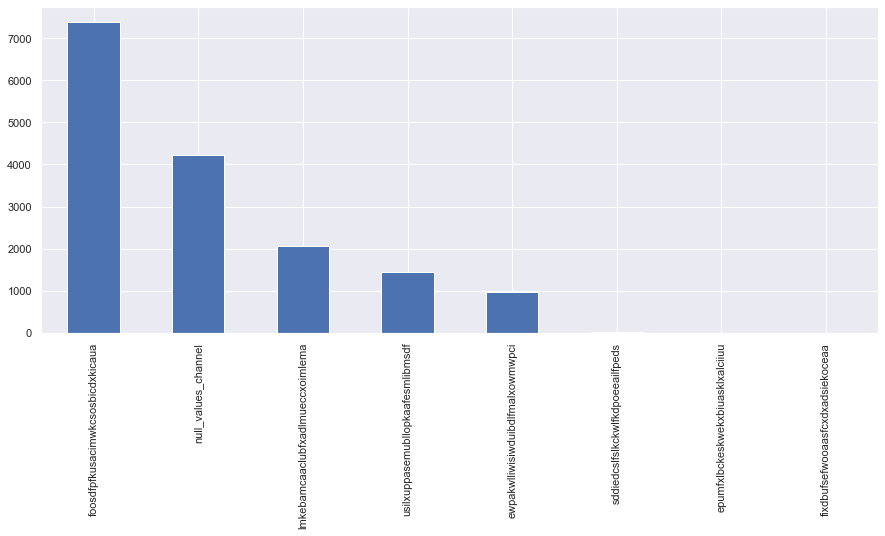

In [34]:
# Transform to categorical data type
train["channel_sales"] = train["channel_sales"].astype("category")
train['channel_sales'].value_counts().plot(kind = 'bar' , figsize = (15,6))

In [1]:
string = "aaaaaaa"
stri = string[:2]
print(stri)

aa


In [37]:
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")
categories_channel.columns = [ i[:11] for i in categories_channel.columns]
categories_channel

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
16091,0,0,0,1,0,0,0,0
16092,0,0,0,1,0,0,0,0
16093,0,0,0,1,0,0,0,0
16094,0,0,0,1,0,0,0,0


In [40]:
categories_channel.drop(columns = ['channel_nul'] , inplace = True)

## origin_up

In [42]:
print(train['origin_up'].isnull().sum())
train['origin_up'].value_counts()

0


lxidpiddsbxsbosboudacockeimpuepw    7912
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [43]:
train["origin_up"] = train["origin_up"].astype("category")

In [46]:
# Create dummy variables
categories_origin = pd.get_dummies(train["origin_up"], prefix = "origin" , drop_first = True)
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]
#categories_origin.drop(columns=["origin_nul"],inplace=True)
categories_origin

,origin_kam,origin_ldk,origin_lxi,origin_usa
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
16091,0,0,1,0
16092,0,0,1,0
16093,0,0,1,0
16094,0,0,1,0


In [48]:
train = pd.merge(train, categories_channel, left_index=True, right_index=True) # Common index(used when there is no keys , just
train = pd.merge(train, categories_origin, left_index=True, right_index=True)  # on using index).


In [49]:
train.drop(columns=["channel_sales", "origin_up"],inplace=True)
train.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'tenure',
       'months_to_end', 'months_modif_prod', 'months_renewal', 'channel_epu',
       'channel_ewp', 'channel_fix', 'channel_foo', 'channel_lmk',
       'channel_sdd', 'channel_usi', 'origin_kam', 'origin_ldk', 'origin_lxi',
       'origin_usa'],
      dtype='object')

# Log tranformation

Specially when data is skewed

In [50]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.522179,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.280629,0.227634,0.491551,0.000124
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.140728,79.023251,0.026149,0.048427,5.191810,494.366979,23.691309,27.906072,1.459808,366.571095,1.676101,21.770392,0.298796,1.725853,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.449320,0.419318,0.499944,0.011147
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,1.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.025000,11.950000,1.000000,52.017500,4.000000,12.500000,0.000000,4.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.085917,44.311378,44.465000,21.090000,21.000000,1.000000,119.900000,5.000000,13.856000,0.000000,5.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.735000,6.000000,19.800000,0.000000,7.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,16.000000,17.000000,185.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# REmove negative values
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan


In [52]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

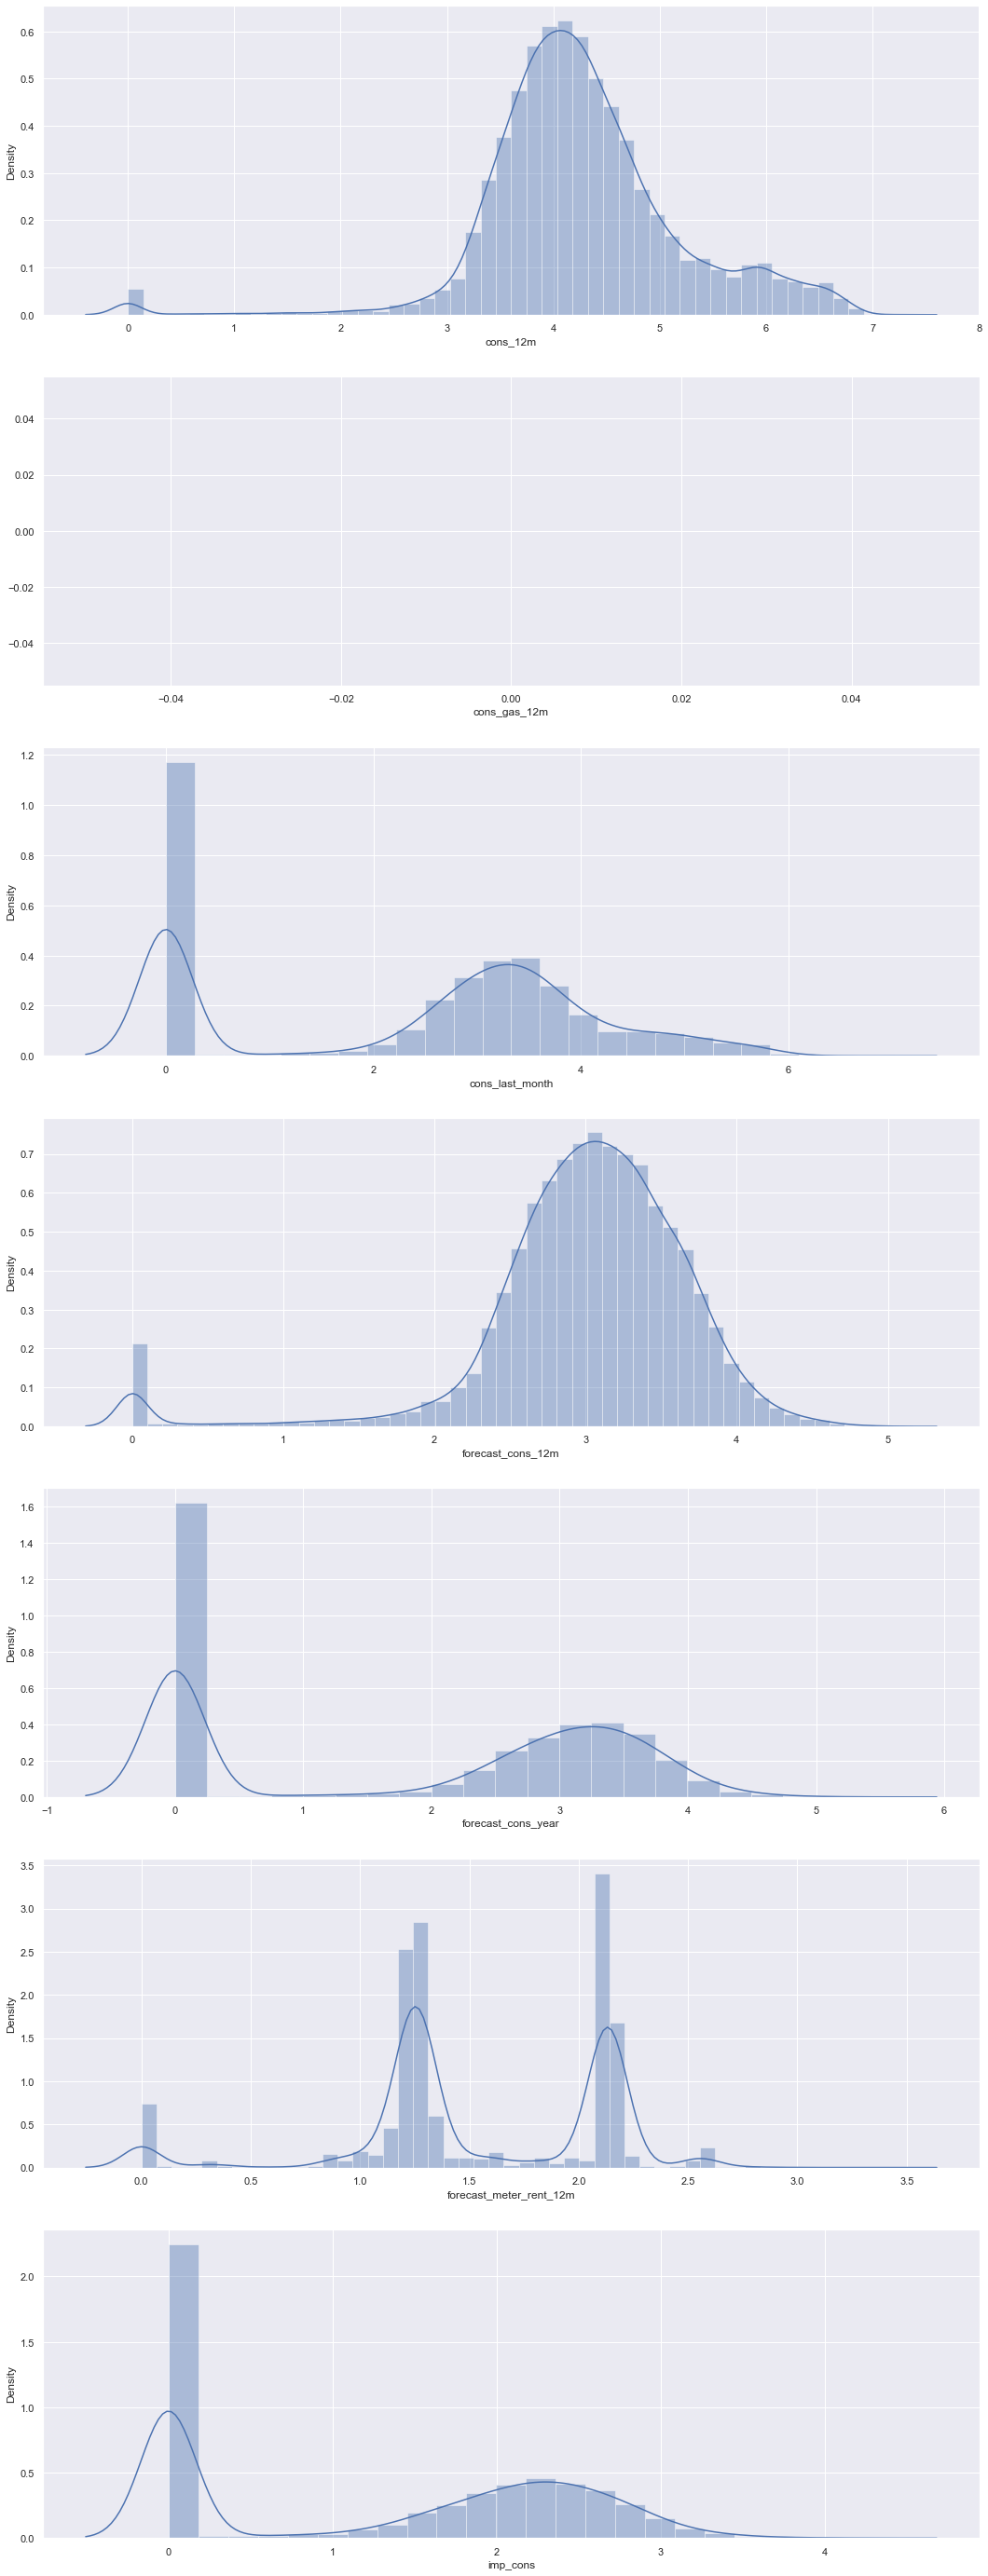

In [54]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

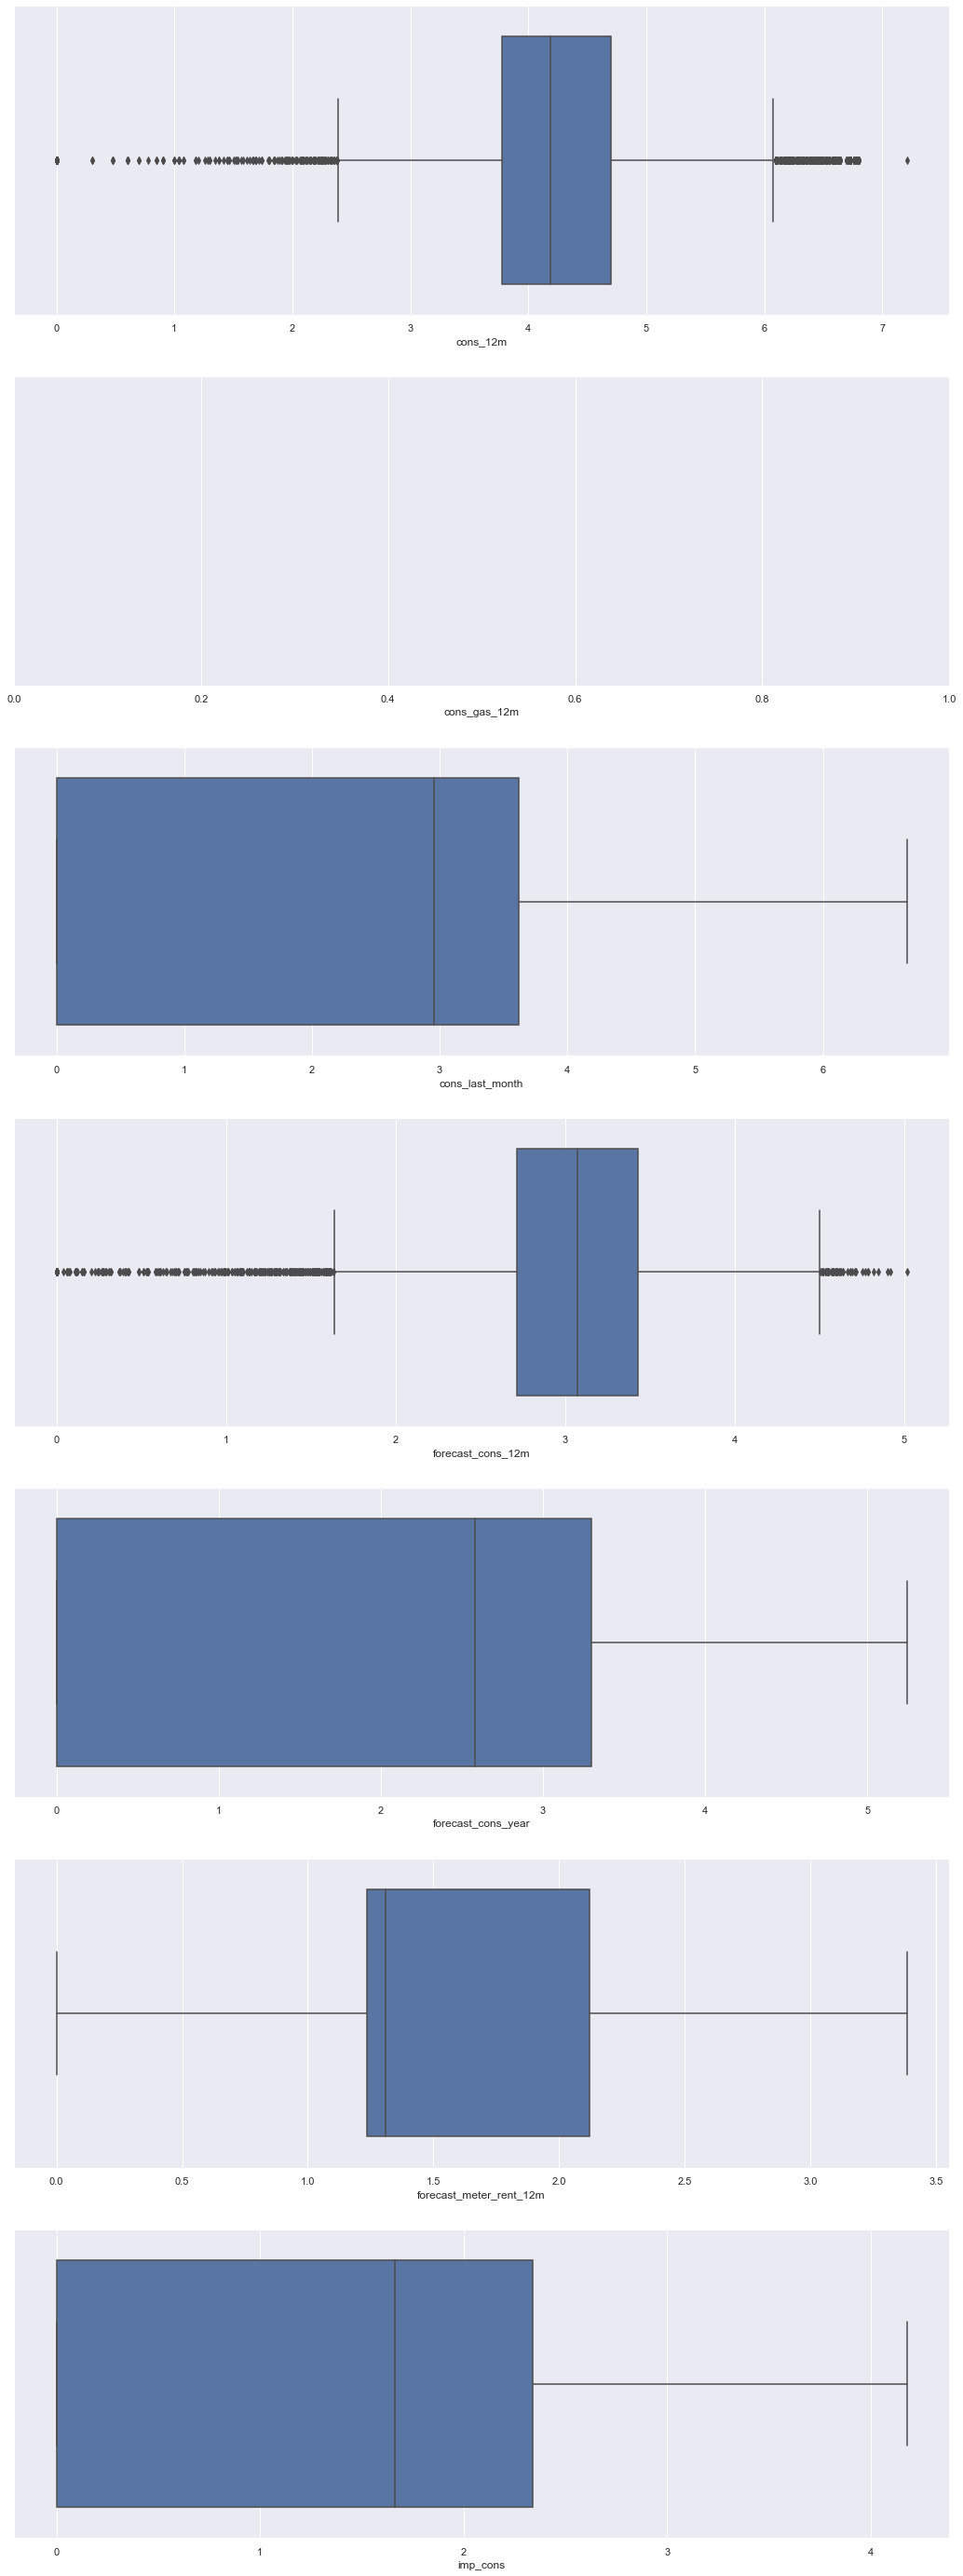

In [55]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [56]:
train.describe()


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,16096.000000,16092.000000,16096.000000,16096.000000,16096.000000,16069.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,1.305021,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.522179,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.280629,0.227634,0.491551,0.000124
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.140728,0.589394,0.026149,0.048427,5.191810,1.165532,23.691309,27.906072,1.459808,366.571095,1.676101,21.770392,0.298796,1.725853,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.449320,0.419318,0.499944,0.011147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,0.000000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,1.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,0.000000,12.025000,11.950000,1.000000,52.017500,4.000000,12.500000,0.000000,4.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.085917,44.311378,1.662380,21.090000,21.000000,1.000000,119.900000,5.000000,13.856000,0.000000,5.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,2.341118,29.640000,29.640000,1.000000,275.735000,6.000000,19.800000,0.000000,7.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,4.177357,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,16.000000,17.000000,185.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation

In [58]:
print(features.columns)
correlation = features.corr()

Index(['id', 'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3'],
      dtype='object')


In [65]:
correlation.columns.values

array(['mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3'],
      dtype=object)

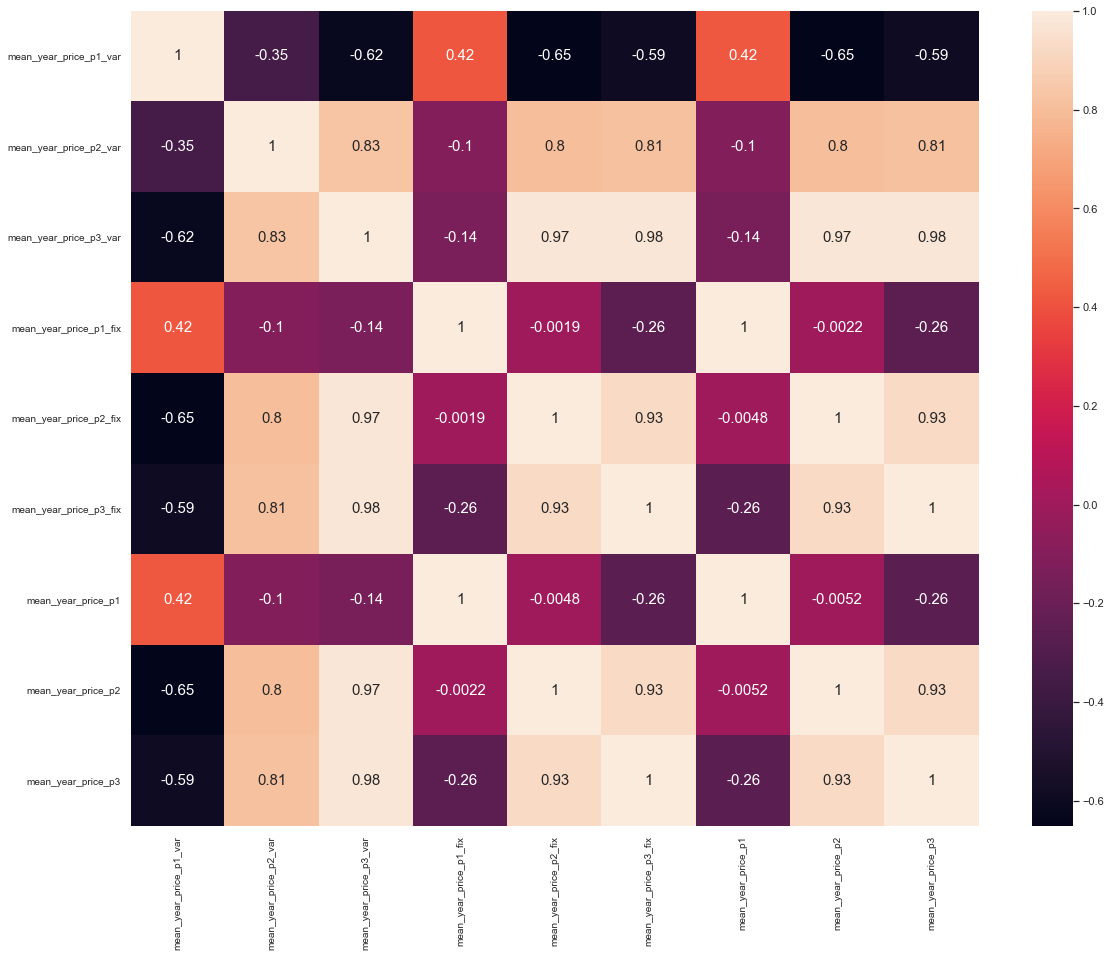

In [66]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':15})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [67]:
correlation = train.corr()

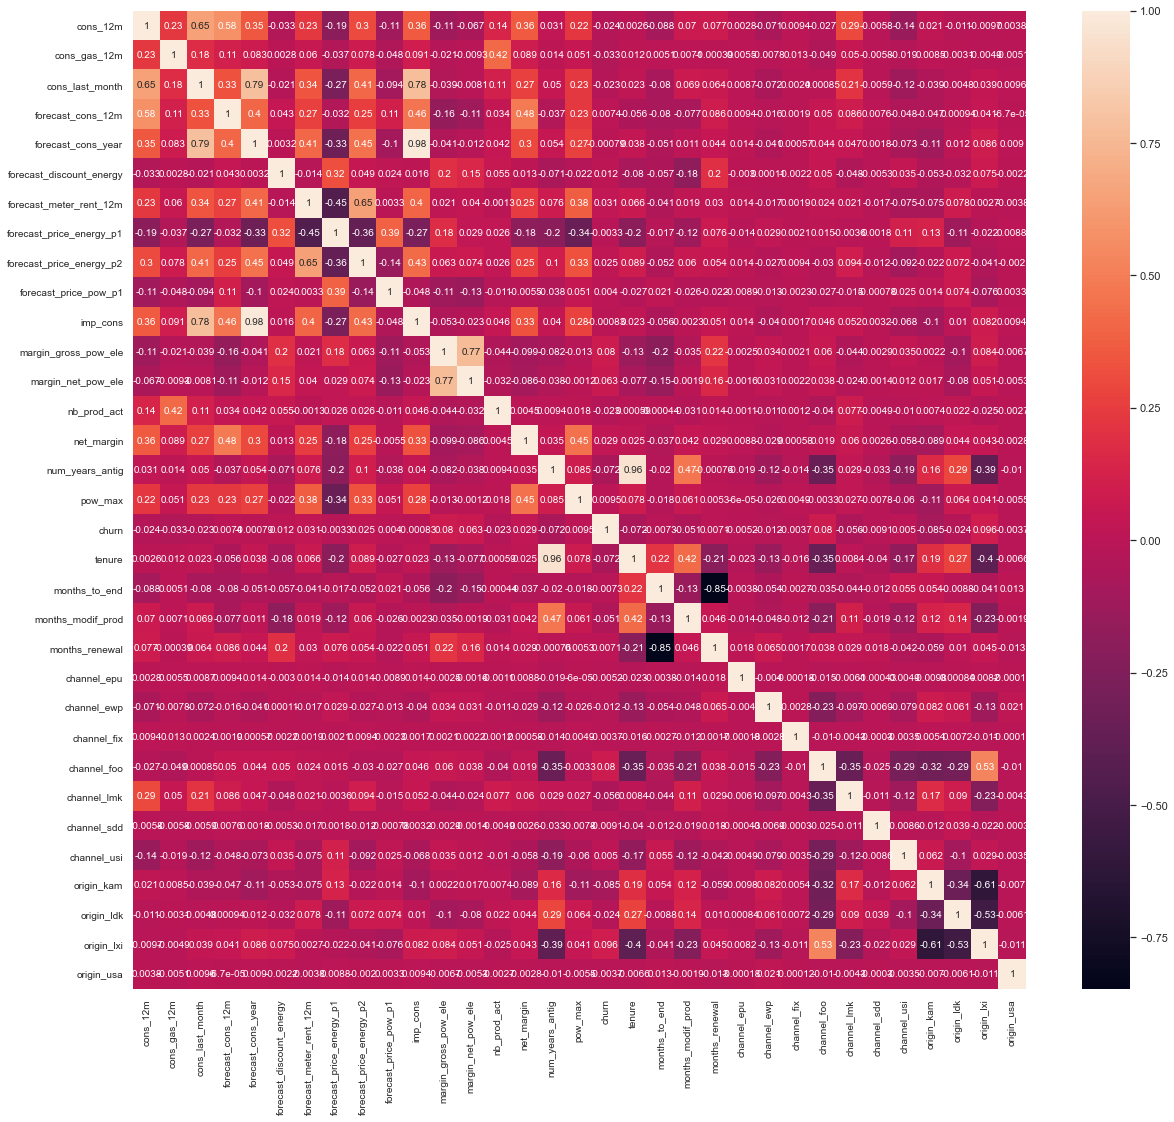

In [68]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [69]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

In [73]:
from scipy.stats import zscore


In [74]:
zscore(features['mean_year_price_p1_var'])

array([-0.68988855,  0.22346027,  1.67617894, ...,  0.53160958,
       -0.70975048, -0.64764233])

In [77]:
arr = np.array([10,20,30,40,50,60,70,80,90,100,350])
print(zscore(arr))

[-0.80587076 -0.69366091 -0.58145105 -0.4692412  -0.35703135 -0.2448215
 -0.13261164 -0.02040179  0.09180806  0.20401791  3.00926422]


In [90]:
def outlier_removal(dataframe , col , z = 3):
    df = dataframe.copy(deep = True)
    df.dropna(inplace = True , subset = [col])
    df['zscore'] = zscore(df[col])
    mean_ = df[( df['zscore'] > -z ) & df['zscore'] < z][col].mean()
    
    dataframe[col].fillna(mean_)
    dataframe['zscore'] = zscore(dataframe[col])
    outlier_count = dataframe[(dataframe['zscore'] < -z) | (dataframe['zscore'] > z)].index
    dataframe.loc[(dataframe['zscore'] < -z) | (dataframe['zscore'] > z) , col] = mean_
    
    print("Total {} outliers in {} are removed with mean : {} .".format(len(outlier_count),col , mean_)  )
    dataframe.drop(columns = ['zscore'] , inplace = True)
    return dataframe

In [85]:
idx = train[train['forecast_cons_12m'] > 4].index
print(len(idx))

539


In [86]:
for c in features.columns:
    if c != 'id':
        features = outlier_removal(features , c)

Total outliers : Index(['9', '127', '169', '172', '174', '204', '245', '290', '410', '769',
       ...
       '15344', '15375', '15444', '15459', '15623', '15630', '15687', '15688',
       '15696', '15774'],
      dtype='object', length=276) are removed with mean : 0.14102242108323162 .
Total outliers : Index([], dtype='object') are removed with mean : 0.05463577481998005 .
Total outliers : Index([], dtype='object') are removed with mean : 0.030502696086674174 .
Total outliers : Index(['169', '174', '204', '823', '1039', '1042', '1366', '1450', '1510',
       '1679',
       ...
       '15207', '15225', '15344', '15444', '15623', '15630', '15687', '15688',
       '15696', '15774'],
      dtype='object', length=120) are removed with mean : 43.33475821387264 .
Total outliers : Index([], dtype='object') are removed with mean : 10.625528145041802 .
Total outliers : Index([], dtype='object') are removed with mean : 6.411368384603104 .
Total outliers : Index(['169', '174', '204', '823', '1039

In [87]:
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [93]:
train = outlier_removal(train,"cons_12m")
train = outlier_removal(train,"cons_gas_12m")
train = outlier_removal(train,"cons_last_month")
train = outlier_removal(train,"forecast_cons_12m")
#train = outlier_removal(train,"forecast_cons_year")
train = outlier_removal(train,"forecast_discount_energy")
train = outlier_removal(train,"forecast_meter_rent_12m")
train = outlier_removal(train,"forecast_price_energy_p1")
train = outlier_removal(train,"forecast_price_energy_p2")
train = outlier_removal(train,"forecast_price_pow_p1")
train = outlier_removal(train,"imp_cons")
train = outlier_removal(train,"margin_gross_pow_ele")
train = outlier_removal(train,"margin_net_pow_ele")
train = outlier_removal(train,"net_margin")
train = outlier_removal(train,"pow_max")
train = outlier_removal(train,"months_to_end")
train = outlier_removal(train,"months_modif_prod")
train = outlier_removal(train,"months_renewal")


Total 0 outliers in cons_12m are removed with mean : 4.283811706404191 .
Total 0 outliers in cons_gas_12m are removed with mean : 0.8002998543146665 .
Total 0 outliers in cons_last_month are removed with mean : 2.3592811275110646 .
Total 0 outliers in forecast_cons_12m are removed with mean : 3.006825741374352 .
Total 705 outliers in forecast_discount_energy are removed with mean : 0.04548174711903905 .
Total 0 outliers in forecast_meter_rent_12m are removed with mean : 1.5496095304623498 .
Total 148 outliers in forecast_price_energy_p1 are removed with mean : 0.13537760991430411 .
Total 0 outliers in forecast_price_energy_p2 are removed with mean : 0.05295074349405134 .
Total 594 outliers in forecast_price_pow_p1 are removed with mean : 43.67127914747643 .
Total 0 outliers in imp_cons are removed with mean : 1.3050208239037335 .
Total 272 outliers in margin_gross_pow_ele are removed with mean : 20.984222251209523 .
Total 299 outliers in margin_net_pow_ele are removed with mean : 21.13

In [94]:
train.reset_index(drop=True, inplace=True)

In [95]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_ready.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "history_ready.pkl")

In [97]:
pd.to_pickle(history, PICKLE_HISTORY_DIR)
pd.to_pickle(train, PICKLE_TRAIN_DIR)


In [98]:
PICKLE_FEATURE_DIR = os.path.join(".." , "processed_data", "feature_ready.pkl")
pd.to_pickle(features , PICKLE_FEATURE_DIR)